In [1]:
# Install required libraries if not already installed
!pip install yfinance pandas numpy matplotlib seaborn scipy PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 12.2 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import EfficientFrontier, risk_models, expected_returns
from datetime import datetime, timedelta


##Selection of 10 Assets

In [3]:
# Example asset list - replace with your choices
assets = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'JPM', 'V', 'JNJ']
end_date = datetime.today()
start_date = end_date - timedelta(days=3*365)

## Getting Historical Data

In [5]:
data = yf.download(assets, start=start_date, end=end_date)['Close']
data.head()

/tmp/ipython-input-5-2178217691.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(assets, start=start_date, end=end_date)['Close']
[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,GOOGL,JNJ,JPM,META,MSFT,NVDA,TSLA,V
Date,,,,,,,,,,
2022-06-22,133.212845,108.949997,110.822861,160.501617,106.114517,154.999664,246.867920,16.336439,236.086670,189.438141
2022-06-23,136.086731,112.440002,111.572853,164.081741,104.953674,157.883835,252.456161,16.201632,235.070007,192.194412
2022-06-24,139.423172,116.459999,117.271683,166.483704,108.086075,169.231583,261.077515,17.101334,245.706665,200.863861
2022-06-27,139.423172,113.220001,115.142952,166.328415,107.220062,168.565231,258.337036,16.844700,244.919998,198.957932
2022-06-28,135.269821,107.400002,111.339752,161.597595,106.704132,159.803314,250.135040,15.958980,232.663330,193.640945


## Descriptive Analytics and Statistics and Calculation for Returns

In [6]:
returns = data.pct_change().dropna()
returns.describe()

Ticker,AAPL,AMZN,GOOGL,JNJ,JPM,META,MSFT,NVDA,TSLA,V
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,0.000706,0.001118,0.000752,-0.000034,0.001387,0.002360,0.001018,0.003477,0.001180,0.000853
std,0.017850,0.022270,0.020422,0.010758,0.015427,0.027818,0.016733,0.034200,0.039340,0.012619
min,-0.092456,-0.089791,-0.095094,-0.075916,-0.074838,-0.245571,-0.077156,-0.169682,-0.154262,-0.077374
25%,-0.008047,-0.011033,-0.010759,-0.005296,-0.006376,-0.010677,-0.007712,-0.016025,-0.020546,-0.005641
50%,0.001187,0.000344,0.001052,0.000340,0.001710,0.001372,0.001143,0.003503,0.000964,0.001602
75%,0.009581,0.013759,0.011570,0.005704,0.008945,0.014330,0.009800,0.022596,0.021612,0.007308
max,0.153288,0.121778,0.102244,0.060728,0.115445,0.232824,0.101337,0.243696,0.226900,0.078373


## Data Visualizations and Time Series Analysis  & Histograms based Data Visualization

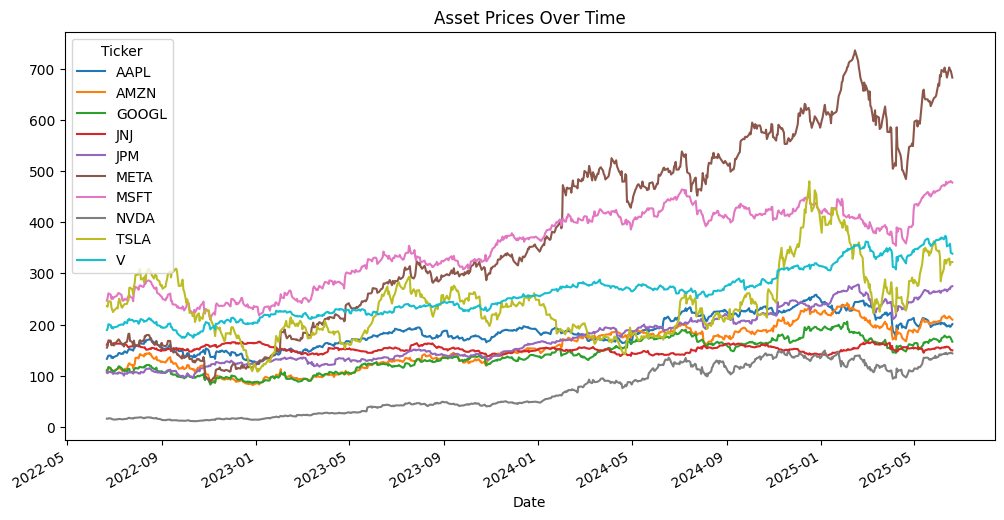

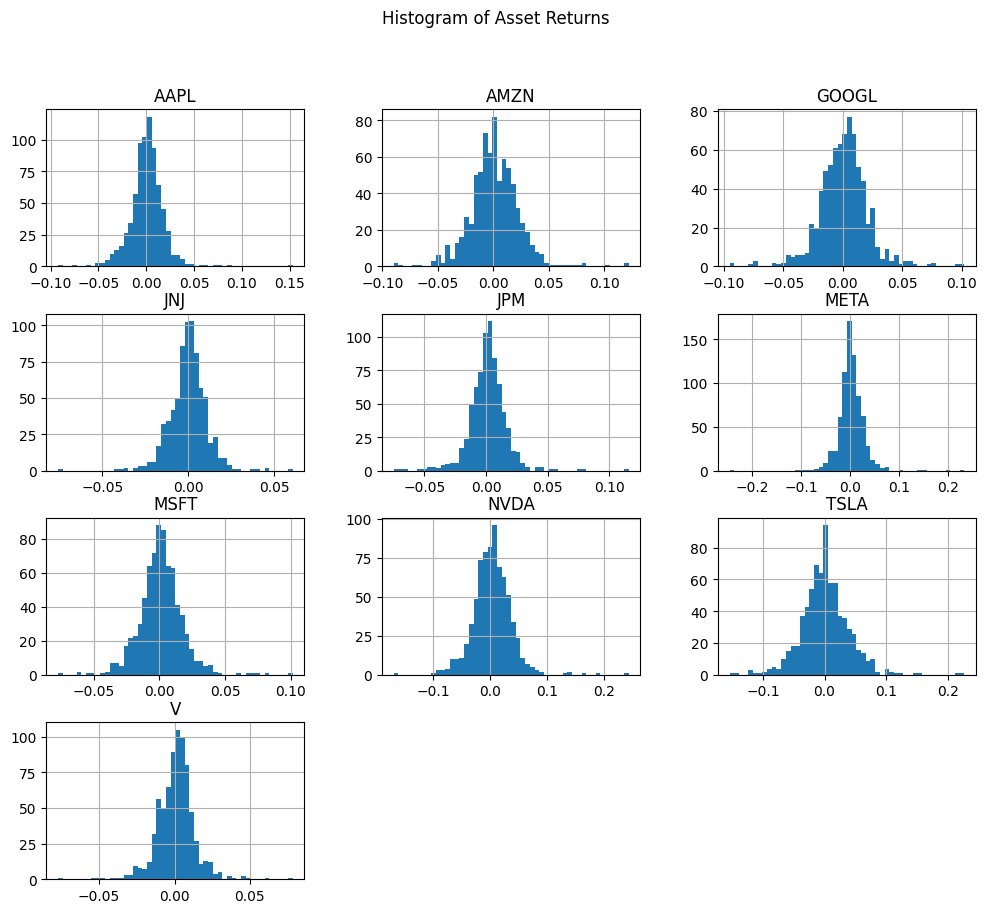

In [7]:
data.plot(figsize=(12, 6), title='Asset Prices Over Time')
plt.show()

returns.hist(bins=50, figsize=(12, 10))
plt.suptitle('Histogram of Asset Returns')
plt.show()

## Correlation Analysis

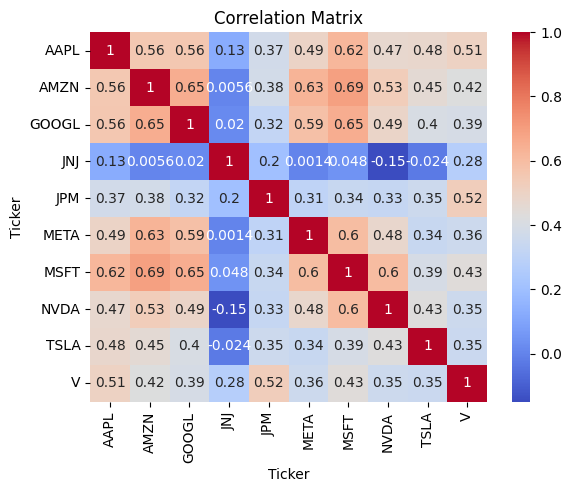

In [8]:
corr_matrix = returns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Portfolio Optimization and Efficient Frontier

In [9]:
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.0), ('AMZN', 0.0), ('GOOGL', 0.0), ('JNJ', 0.0), ('JPM', 0.49801), ('META', 0.14614), ('MSFT', 0.0), ('NVDA', 0.35585), ('TSLA', 0.0), ('V', 0.0)])
Expected annual return: 66.4%
Annual volatility: 29.8%
Sharpe Ratio: 2.23


(np.float64(0.6641856437834732),
 np.float64(0.2975372544605524),
 np.float64(2.2322772487353553))